In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("SuperStoreOrders.csv")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


# 1. Data Cleaning

## Tahap ini bertujuan untuk membersihkan data sebelum dilakukan analisis lebih lanjut.  
## Langkah-langkah utama yang dilakukan meliputi:
## 1. Menangani nilai kosong (missing value)
## 2. Menghapus data duplikat
## 3. Menghapus data outlier

In [15]:
# Mengecek jumlah missing value pada setiap kolom
print("Jumlah Missing Value Sebelum Penanganan:\n")
print(df.isnull().sum())

# Menangani missing value dengan mengisi median (untuk kolom numerik)
df.fillna(df.median(numeric_only=True), inplace=True)

print("\nJumlah Missing Value Setelah Penanganan:\n")
print(df.isnull().sum())

Jumlah Missing Value Sebelum Penanganan:

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Jumlah Missing Value Setelah Penanganan:

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


In [16]:
# Mengecek jumlah data duplikat
print(f"Jumlah Data Duplikat Sebelum Dihapus: {df.duplicated().sum()}")

# Menghapus duplikat
df.drop_duplicates(inplace=True)

# Mengecek ulang
print(f"Jumlah Data Duplikat Setelah Dihapus: {df.duplicated().sum()}")

Jumlah Data Duplikat Sebelum Dihapus: 0
Jumlah Data Duplikat Setelah Dihapus: 0


Visualisasi Boxplot Sebelum Penanganan Outlier:



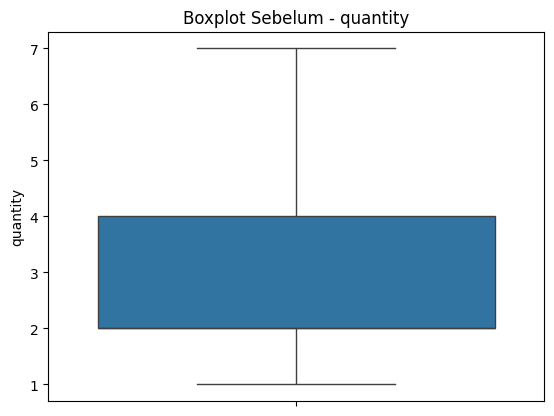

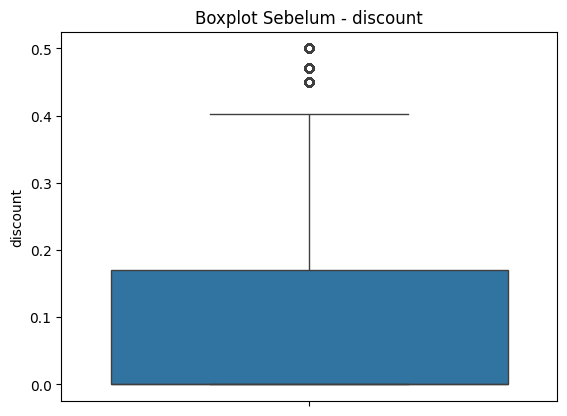

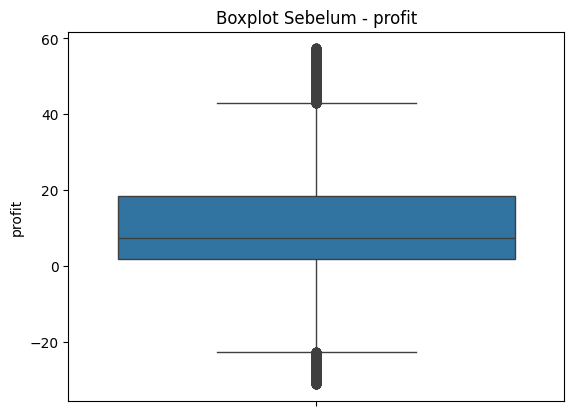

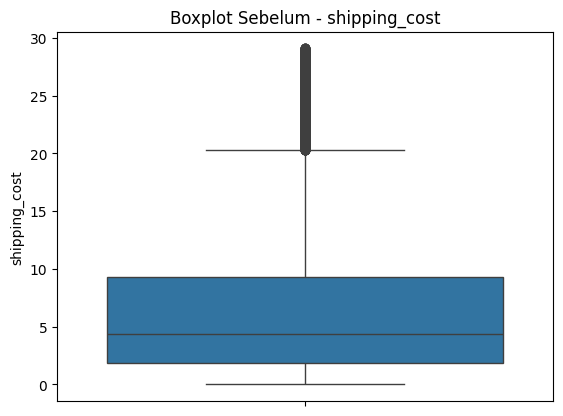

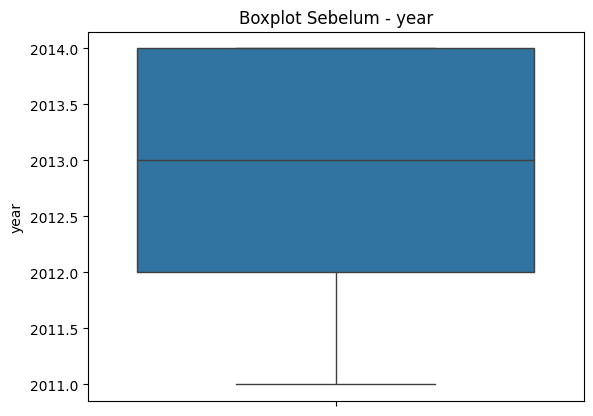

Data setelah outlier dihapus.

Jumlah Data Sekarang: 25698 baris

Visualisasi Boxplot Setelah Penanganan Outlier:



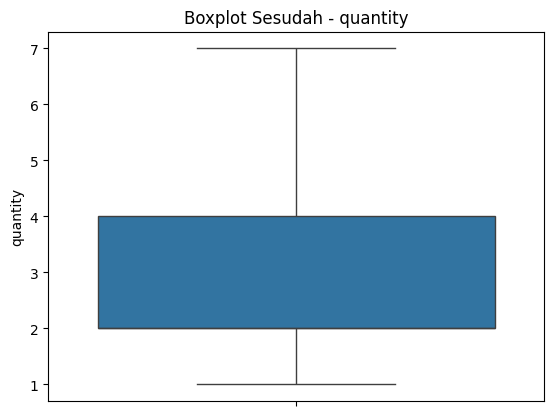

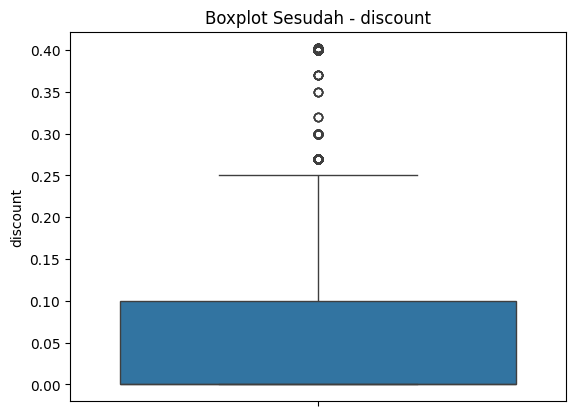

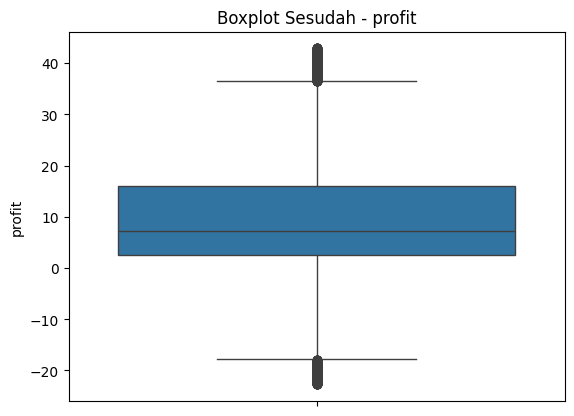

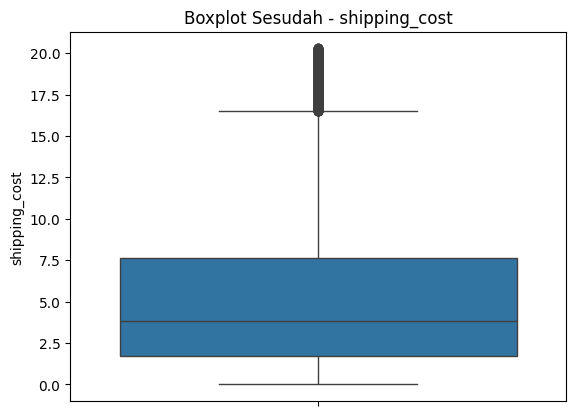

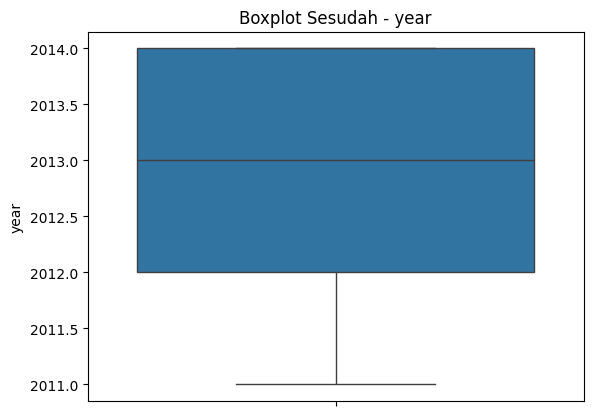

In [17]:
# Menampilkan boxplot untuk mendeteksi outlier
numeric_cols = df.select_dtypes(include=np.number).columns

print("Visualisasi Boxplot Sebelum Penanganan Outlier:\n")
for col in numeric_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f'Boxplot Sebelum - {col}')
    plt.show()

# Menghapus outlier menggunakan metode IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
          (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data setelah outlier dihapus.\n")
print(f"Jumlah Data Sekarang: {df.shape[0]} baris")

print("\nVisualisasi Boxplot Setelah Penanganan Outlier:\n")
for col in numeric_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f'Boxplot Sesudah - {col}')
    plt.show()


# 2. Normalisasi / Standarisasi Kolom Numerik

## Menstandarkan semua kolom numerik agar memiliki skala seragam (mean = 0, std = 1).
## Hal ini penting supaya fitur dengan skala besar tidak mendominasi fitur lainnya.

In [18]:
from sklearn.preprocessing import StandardScaler

# Menentukan kolom numerik (selain target 'sales')
num_cols = df.select_dtypes(include=np.number).columns.drop('sales', errors='ignore')

# Inisialisasi scaler
scaler = StandardScaler()

# Simpan hasil ke dataframe baru
df[num_cols] = scaler.fit_transform(df[num_cols])

print("5 Data Teratas Setelah Standarisasi:")
display(df[num_cols].head())

5 Data Teratas Setelah Standarisasi:


,quantity,discount,profit,shipping_cost,year
1,0.148878,0.282149,2.244170,0.928738,-1.620693
2,0.783769,-0.568293,1.693216,0.598565,-1.620693
4,1.418661,0.282149,2.393537,-0.140598,-1.620693
5,-0.486014,0.282149,0.461581,-0.758342,-1.620693
16,-0.486014,-0.568293,2.835437,0.649688,-1.620693


# 3. Encoding Kolom Kategorikal

## Mengubah kolom bertipe teks (kategorikal) menjadi angka agar dapat diproses oleh algoritma machine learning.
## Menggunakan LabelEncoder untuk setiap kolom kategori.

In [19]:
from sklearn.preprocessing import LabelEncoder

# Mendeteksi kolom kategorikal
cat_cols = df.select_dtypes(exclude=np.number).columns

# Inisialisasi encoder
encoder = LabelEncoder()

# Encoding setiap kolom kategorikal
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print("Kolom Kategorikal yang Dikonversi:")
print(list(cat_cols))
print("\n5 Data Teratas Setelah Encoding:")
display(df.head())

Kolom Kategorikal yang Dikonversi:
['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment', 'state', 'country', 'market', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'order_priority']

5 Data Teratas Setelah Encoding:


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
1,7548,0,1366,3,398,0,574,6,0,9,...,1,15,157,24,0.148878,0.282149,2.244170,0.928738,3,-1.620693
2,6614,0,1220,2,48,0,140,55,3,5,...,1,14,2719,377,0.783769,-0.568293,1.693216,0.598565,1,-1.620693
4,7548,0,1366,3,398,0,574,6,0,9,...,0,9,1005,17,1.418661,0.282149,2.393537,-0.140598,3,-1.620693
5,7548,0,1366,3,398,0,574,6,0,9,...,1,12,924,354,-0.486014,0.282149,0.461581,-0.758342,3,-1.620693
16,9817,1009,1317,3,351,0,886,58,3,5,...,1,1,622,27,-0.486014,-0.568293,2.835437,0.649688,3,-1.620693


# 4. Feature Engineering (Membuat Fitur Baru)

## Menambahkan fitur baru yang dapat memperkaya informasi dataset.
## Contohnya, membuat fitur discount_ratio yang menunjukkan perbandingan antara diskon dan jumlah barang.

In [20]:
# Membuat fitur baru 'discount_ratio'
if 'discount' in df.columns and 'quantity' in df.columns:
    df['discount_ratio'] = df['discount'] / (df['quantity'] + 1)
    print("Fitur baru 'discount_ratio' berhasil ditambahkan!\n")
    display(df[['discount', 'quantity', 'discount_ratio']].head())
else:
    print("Kolom 'discount' atau 'quantity' tidak ditemukan dalam dataset.")

Fitur baru 'discount_ratio' berhasil ditambahkan!



,discount,quantity,discount_ratio
1,0.282149,0.148878,0.245587
2,-0.568293,0.783769,-0.318591
4,0.282149,1.418661,0.116655
5,0.282149,-0.486014,0.548943
16,-0.568293,-0.486014,-1.105659


# 5. Splitting Data Training & Testing

## Memisahkan data menjadi dua bagian:

## Training set (80%) → digunakan untuk melatih model

## Testing set (20%) → digunakan untuk menguji performa model

In [21]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop('sales', axis=1)
y = df['sales']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran Data:")
print(f"Training Data : {X_train.shape}")
print(f"Testing Data  : {X_test.shape}")

Ukuran Data:
Training Data : (20558, 21)
Testing Data  : (5140, 21)
